<a href="https://colab.research.google.com/github/M4rck0/Aprendizaje_Automatico/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("/content/boston.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Variables
variables = df[['rm', 'lstat']]

# Estandarización
escalar = StandardScaler()
vars_escaladas = escalar.fit_transform(variables)

In [4]:
# Seleccionar número óptimo de clusters con BIC
n_componentes = np.arange(1, 10)
modelos = [GaussianMixture(n, covariance_type = 'full', random_state = 42).fit(vars_escaladas)
           for n in n_componentes]

bics = [modelo.bic(vars_escaladas) for modelo in modelos]

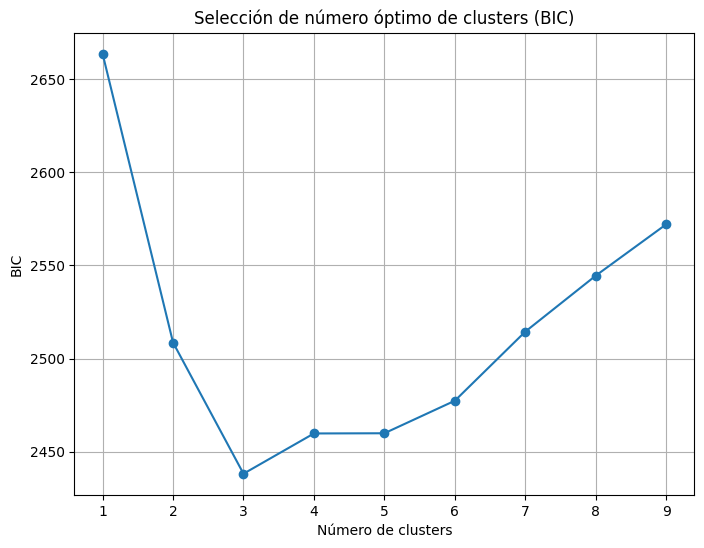

In [5]:
# Graficar BIC vs número de clusters
plt.figure(figsize = (8,6))
plt.plot(n_componentes, bics, marker = 'o')
plt.title("Selección de número óptimo de clusters (BIC)")
plt.xlabel("Número de clusters")
plt.ylabel("BIC")
plt.grid(True)
plt.savefig("grafico_bic.png")
plt.show()

In [6]:
# Determinar k óptimo
k_optimo = n_componentes[np.argmin(bics)]
print(f"Número óptimo de clusters con BIC: {k_optimo}")

Número óptimo de clusters con BIC: 3


In [7]:
# Ajustar modelo GMM con k óptimo
gmm = GaussianMixture(n_components = k_optimo, random_state = 42)
gmm.fit(vars_escaladas)
df['cluster'] = gmm.predict(vars_escaladas)

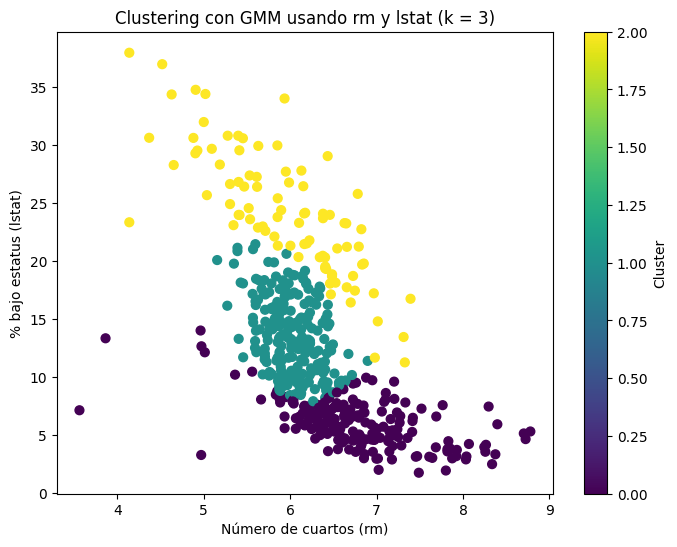

In [8]:
# Gráfico
plt.figure(figsize = (8,6))
plt.scatter(df['rm'], df['lstat'], c = df['cluster'], cmap = 'viridis', s = 40)
plt.xlabel('Número de cuartos (rm)')
plt.ylabel('% bajo estatus (lstat)')
plt.title(f'Clustering con GMM usando rm y lstat (k = {k_optimo})')
plt.colorbar(label = 'Cluster')
plt.savefig("cluster_gmm.png")
plt.show()